#Feature engineering
Basado en:
- [A Practical Guide to Feature Engineering in Python](https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8)
- [Top 9 Feature Engineering Techniques with Python
](https://rubikscode.net/2020/11/15/top-9-feature-engineering-techniques/)
- [Feature selection — Correlation and P-value](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#avoids printing unnecesary warnings
warnings.filterwarnings('ignore')

main_data_set = pd.read_csv("sample_data/financial_data.csv")
print(main_data_set.shape[0]) # row number
main_data_set.head()

1524


,Company,Industry Sector,Current Ratio,Quick Ratio,Cash Ratio,Free Cash Flow Margin,Revenue Growth Year over Year,Common Equity to Tot Assets,Long Term Assets as % Total Assets,EBIT/Interest,Total Debt to Total Assets,Tot Debt to Common Equity,Cashflow to Total Liabilities,Free Cash Flow to Total Debt,Gross Margin,Operating Margin,Profit Margin,Net Income Margin Adjusted,Return on Assets,Return on Common Equity,Inventory Turnover,Accounts Receivable Turnover,Accounts Payable Turnover,Net Fixed Asset Turnover,Gross Fixed Asset Turnover,Asset Turnover,Sales per Employee,Operating Profit Per Employee,Cash Conversion Cycle
0,CCOI UW Equity,Communications,4.831877,4.399331,3.931482,14.850828,4.017878,-29.302623,54.388057,1.711135,121.746627,NaN,10.846887,0.084588,61.423017,18.820883,1.094168,1.192761,0.643278,NaN,NaN,13.419504,21.022062,1.168478,0.371826,0.587921,5.245642e+05,98655.58633,NaN
1,AA UN Equity,Basic Materials,1.637088,0.752626,0.582035,0.441525,-10.993961,22.281292,69.582773,2.109677,17.543742,78.737542,4.002438,0.015343,14.182641,3.521430,-1.830713,-2.239931,-1.152894,-4.580358,5.239316,18.261554,5.350191,1.217038,0.438112,0.629751,7.198450e+05,25348.83721,21.489771
2,OSTK UQ Equity,Communications,1.778919,1.674050,1.582088,6.955180,74.712317,45.011527,29.808459,26.497210,8.223061,18.268788,49.880677,2.715859,22.728718,2.048253,2.196305,2.721870,8.974944,22.914791,326.119341,87.978159,21.285373,16.858905,6.823193,4.086384,1.457019e+06,29843.42857,-11.912495
3,BTU UN Equity,Energy,1.796484,1.125854,0.897040,-6.979973,-37.684388,19.918150,69.567826,-11.932761,34.591074,173.666093,-0.263172,-0.102825,-1.232168,-57.901496,-64.916178,-21.997674,-33.368719,-105.565276,9.835104,12.418534,NaN,0.732871,0.543932,0.514028,6.263261e+05,-362652.17390,NaN
4,TTGT UQ Equity,Communications,2.752445,2.647314,1.781636,30.862808,10.763902,44.353963,72.016655,NaN,40.396173,91.076808,20.645748,0.248287,74.831509,15.380520,11.503208,13.819216,5.033207,9.602849,NaN,4.410404,11.782616,3.782812,2.203679,0.437577,1.578468e+05,24276.59574,NaN


In [ ]:
main_data_set.dtypes

Company                                object
Industry Sector                        object
Current Ratio                         float64
Quick Ratio                           float64
Cash Ratio                            float64
Free Cash Flow Margin                 float64
Revenue Growth Year over Year         float64
Common Equity to Tot Assets           float64
Long Term Assets as % Total Assets    float64
EBIT/Interest                         float64
Total Debt to Total Assets            float64
Tot Debt to Common Equity             float64
Cashflow to Total Liabilities         float64
Free Cash Flow to Total Debt          float64
Gross Margin                          float64
Operating Margin                      float64
Profit Margin                         float64
Net Income Margin Adjusted            float64
Return on Assets                      float64
Return on Common Equity               float64
Inventory Turnover                    float64
Accounts Receivable Turnover      

Con esta muestra, nos damos cuenta que tenemos la mayoría de campos numéricos continuos. y tan sólo un campo categórico que es el de *industry_sector*.

#Eliminar campos poco aportantes

Para nuestro caso, no consideramos que el campo *company* sea muy aportante, por lo que lo borraremos de entrada.

In [ ]:
main_data_set = main_data_set.drop(columns=['Company'])

# Eliminar registros nulos

Para esto, primero vamos a eliminar los datapoints (filas) cuyos campos tienen más de 21 campos nulos.

In [ ]:
main_data_set = main_data_set.dropna(thresh=21)
print(main_data_set.shape[0]) # row number

1314


En este primer fltro nos ha borrado 210 registros poco aportantes. 
Ahora vamos a ver cuántos campos nulos (N/A) tenemos por cada columna.

In [ ]:
#check for missing values
main_data_set.isna().sum()

Industry Sector                         0
Current Ratio                           0
Quick Ratio                             0
Cash Ratio                              0
Free Cash Flow Margin                   1
Revenue Growth Year over Year          21
Common Equity to Tot Assets             0
Long Term Assets as % Total Assets     23
EBIT/Interest                         322
Total Debt to Total Assets              0
Tot Debt to Common Equity              82
Cashflow to Total Liabilities           4
Free Cash Flow to Total Debt           42
Gross Margin                          130
Operating Margin                        0
Profit Margin                           0
Net Income Margin Adjusted              0
Return on Assets                        0
Return on Common Equity               111
Inventory Turnover                    406
Accounts Receivable Turnover           77
Accounts Payable Turnover             185
Net Fixed Asset Turnover                3
Gross Fixed Asset Turnover        

Dado que hay varios campos que pueden ser aproximados desde otros y que contienen muchos valores nulos, vamos a eliminarlos:


- *Operating Profit Per Employee* tiene demasiados valores nulos y su información es muy similar a la que se tiene en *Sales per Employee*, vamos a eliminar este campo.
- *EBIT/Interest* puede ser aproximado desde *Free Cash Flow to Total Debt*
- *Gross Margin* se puede aproximar desde *Operating margin*
- *Cash Conversion Cycle* porque se puede aproximar desde *Accounts Receivable Turnover* y *Accounts Payable Turnover*
- *Inventory Turnover* porque es poco alcanzable ya que el inventario promedio es difícil de conseguir. 

In [ ]:
main_data_set = main_data_set.drop(columns=['Operating Profit Per Employee', 'EBIT/Interest', 'Gross Margin', 'Cash Conversion Cycle', 'Inventory Turnover'])
main_data_set.isna().sum()

Industry Sector                         0
Current Ratio                           0
Quick Ratio                             0
Cash Ratio                              0
Free Cash Flow Margin                   1
Revenue Growth Year over Year          21
Common Equity to Tot Assets             0
Long Term Assets as % Total Assets     23
Total Debt to Total Assets              0
Tot Debt to Common Equity              82
Cashflow to Total Liabilities           4
Free Cash Flow to Total Debt           42
Operating Margin                        0
Profit Margin                           0
Net Income Margin Adjusted              0
Return on Assets                        0
Return on Common Equity               111
Accounts Receivable Turnover           77
Accounts Payable Turnover             185
Net Fixed Asset Turnover                3
Gross Fixed Asset Turnover            183
Asset Turnover                          0
Sales per Employee                     48
dtype: int64

#Codificar los valores categóricos

Como previamente lo notamos, el único campo categórico es *industry*. En esta sección vamos a codificarlo.

In [ ]:
main_data_set['Industry Sector'] = main_data_set['Industry Sector'].astype('category')
main_data_set['Industry Sector'] = main_data_set['Industry Sector'].cat.codes # replace the categorical field
main_data_set.head()

,Industry Sector,Current Ratio,Quick Ratio,Cash Ratio,Free Cash Flow Margin,Revenue Growth Year over Year,Common Equity to Tot Assets,Long Term Assets as % Total Assets,Total Debt to Total Assets,Tot Debt to Common Equity,Cashflow to Total Liabilities,Free Cash Flow to Total Debt,Operating Margin,Profit Margin,Net Income Margin Adjusted,Return on Assets,Return on Common Equity,Accounts Receivable Turnover,Accounts Payable Turnover,Net Fixed Asset Turnover,Gross Fixed Asset Turnover,Asset Turnover,Sales per Employee
0,1,4.831877,4.399331,3.931482,14.850828,4.017878,-29.302623,54.388057,121.746627,NaN,10.846887,0.084588,18.820883,1.094168,1.192761,0.643278,NaN,13.419504,21.022062,1.168478,0.371826,0.587921,5.245642e+05
1,0,1.637088,0.752626,0.582035,0.441525,-10.993961,22.281292,69.582773,17.543742,78.737542,4.002438,0.015343,3.521430,-1.830713,-2.239931,-1.152894,-4.580358,18.261554,5.350191,1.217038,0.438112,0.629751,7.198450e+05
2,1,1.778919,1.674050,1.582088,6.955180,74.712317,45.011527,29.808459,8.223061,18.268788,49.880677,2.715859,2.048253,2.196305,2.721870,8.974944,22.914791,87.978159,21.285373,16.858905,6.823193,4.086384,1.457019e+06
3,4,1.796484,1.125854,0.897040,-6.979973,-37.684388,19.918150,69.567826,34.591074,173.666093,-0.263172,-0.102825,-57.901496,-64.916178,-21.997674,-33.368719,-105.565276,12.418534,NaN,0.732871,0.543932,0.514028,6.263261e+05
4,1,2.752445,2.647314,1.781636,30.862808,10.763902,44.353963,72.016655,40.396173,91.076808,20.645748,0.248287,15.380520,11.503208,13.819216,5.033207,9.602849,4.410404,11.782616,3.782812,2.203679,0.437577,1.578468e+05


##Nota
Para trabajar mejor con los datos numéricos de ahora en adelante, vamos a sacar la serie correspondiente al campo categórico del dataframe. Al final del proceso la vamos a volver a incluir.

In [ ]:
industry_series = main_data_set["Industry Sector"].copy()
main_data_set = main_data_set.drop(columns=("Industry Sector"))

# Gestionar campos con valores N/A

En esta sección vamos a rellenar los campos que están nulos dependiendo del caso para cada columna.

## Media
Para los siguientes campos, podemos usar la media:

- Free Cash Flow Margin
- Asset Turnover 
- Net Fixed Asset Turnover 
- Return on Assets
- Cashflow to Total Liabilities


In [ ]:
fields_to_apply_mean = ("Free Cash Flow Margin", "Asset Turnover", "Net Fixed Asset Turnover", "Return on Assets", "Cashflow to Total Liabilities")
for key in fields_to_apply_mean:
    main_data_set[key] = main_data_set[key].fillna(main_data_set[key].mean())

main_data_set.isna().sum()

Current Ratio                           0
Quick Ratio                             0
Cash Ratio                              0
Free Cash Flow Margin                   0
Revenue Growth Year over Year          21
Common Equity to Tot Assets             0
Long Term Assets as % Total Assets     23
Total Debt to Total Assets              0
Tot Debt to Common Equity              82
Cashflow to Total Liabilities           0
Free Cash Flow to Total Debt           42
Operating Margin                        0
Profit Margin                           0
Net Income Margin Adjusted              0
Return on Assets                        0
Return on Common Equity               111
Accounts Receivable Turnover           77
Accounts Payable Turnover             185
Net Fixed Asset Turnover                0
Gross Fixed Asset Turnover            183
Asset Turnover                          0
Sales per Employee                     48
dtype: int64

## Mediana
Los siguientes campos se pueden llenar con la mediana:

- *Revenue Growth Year over Year*
- *Long Term Assets as % Total Assets*
- *Tot Debt to Common Equity*
- *Free Cash Flow to Total Debt*

In [ ]:
fields_to_apply_median = ("Revenue Growth Year over Year", "Long Term Assets as % Total Assets", "Tot Debt to Common Equity", "Free Cash Flow to Total Debt")
for key in fields_to_apply_median:
    main_data_set[key] = main_data_set[key].fillna(main_data_set[key].median())

main_data_set.isna().sum()

Current Ratio                           0
Quick Ratio                             0
Cash Ratio                              0
Free Cash Flow Margin                   0
Revenue Growth Year over Year           0
Common Equity to Tot Assets             0
Long Term Assets as % Total Assets      0
Total Debt to Total Assets              0
Tot Debt to Common Equity               0
Cashflow to Total Liabilities           0
Free Cash Flow to Total Debt            0
Operating Margin                        0
Profit Margin                           0
Net Income Margin Adjusted              0
Return on Assets                        0
Return on Common Equity               111
Accounts Receivable Turnover           77
Accounts Payable Turnover             185
Net Fixed Asset Turnover                0
Gross Fixed Asset Turnover            183
Asset Turnover                          0
Sales per Employee                     48
dtype: int64

##Análisis de distribución

Para los campos restantes debemos primero analizar cuál es su distribución antes de aplicar cualquier técnica.

### Return on Common Equity

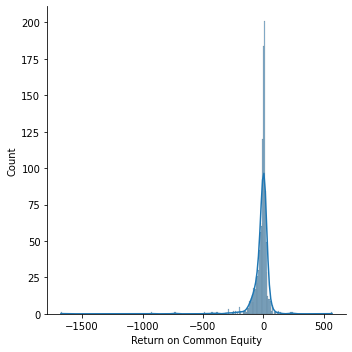

In [ ]:
sns.displot(main_data_set, x="Return on Common Equity", kde=True) # estimaciónde kernel de la densidad

###Accounts Receivable Turnover

In [ ]:
#sns.displot(main_data_set, x="Accounts Receivable Turnover", kde=True)

Dado que la gráfica de *Accounts Receivable Turnover* no nos permite visualizar la información requerida, decidimos calcular el coeficiente de variación con el fin de saber si se debería aplicar algún tipo de escalado.

In [ ]:
mean = main_data_set["Accounts Receivable Turnover"].mean()
std = main_data_set["Accounts Receivable Turnover"].std()
print("Mean:", mean, "Standard deviation:", std, "Coefficient of variation: ", std/mean)

Mean: 59.71180087482123 Standard deviation: 1330.3770072222212 Coefficient of variation:  22.279967908038817


Ya que los datos están demasiado dispersos, vamos a aplicar un logaritmo natural con el fin de condensar los datos.

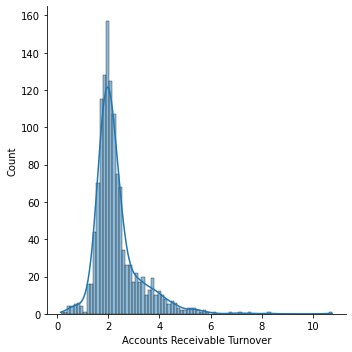

In [ ]:
df_copy = main_data_set.copy()
df_copy["Accounts Receivable Turnover"] = np.log1p(main_data_set["Accounts Receivable Turnover"])
sns.displot(df_copy, x="Accounts Receivable Turnover", kde=True)

###Accounts Payable Turnover

Mean: 14.741530054577499 Standard deviation: 31.29046016407401 Coefficient of variation:  2.122606001427768


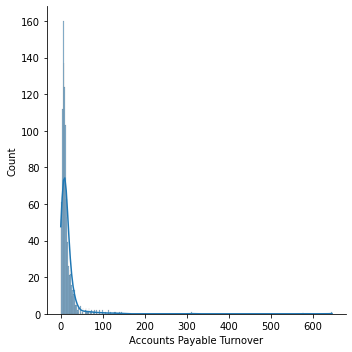

In [ ]:
#Accounts Payable Turnover
mean = main_data_set["Accounts Payable Turnover"].mean()
std = main_data_set["Accounts Payable Turnover"].std()
print("Mean:", mean, "Standard deviation:", std, "Coefficient of variation: ", std/mean)

sns.displot(main_data_set, x="Accounts Payable Turnover", kde=True)

###Gross Fixed Asset Turnover

Mean: 5.995003472635717 Standard deviation: 57.65060455338004 Coefficient of variation:  9.61644222835351


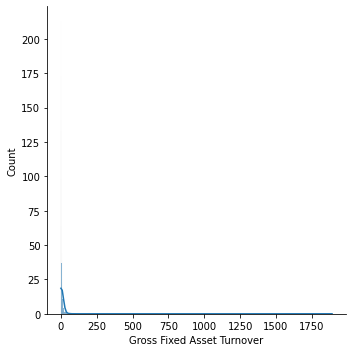

In [ ]:
#Gross Fixed Asset Turnover
mean = main_data_set["Gross Fixed Asset Turnover"].mean()
std = main_data_set["Gross Fixed Asset Turnover"].std()
print("Mean:", mean, "Standard deviation:", std, "Coefficient of variation: ", std/mean)

sns.displot(main_data_set, x="Gross Fixed Asset Turnover", kde=True)

Si miramos el coeficinete de variación, notamos que los datos también están demasiado dispersos, vamos a aplicar un logaritmo natural con el fin de condensar los datos.

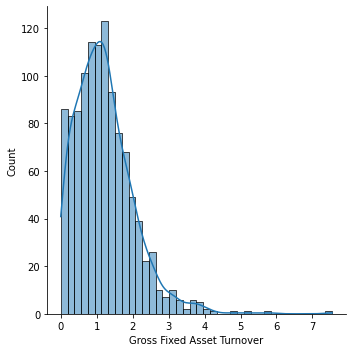

In [ ]:
df_copy["Gross Fixed Asset Turnover"] = np.log1p(main_data_set["Gross Fixed Asset Turnover"])
sns.displot(df_copy, x="Gross Fixed Asset Turnover", kde=True)

###Sales per Employee

Mean: 711809.1261957259 Standard deviation: 2875823.77104083 Coefficient of variation:  4.040161421378103


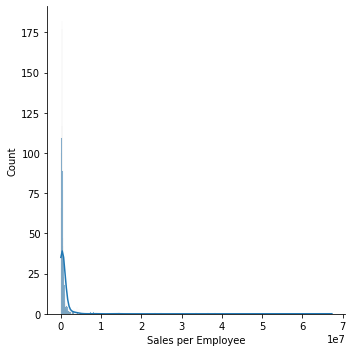

In [ ]:
#Sales per Employee
mean = main_data_set["Sales per Employee"].mean()
std = main_data_set["Sales per Employee"].std()
print("Mean:", mean, "Standard deviation:", std, "Coefficient of variation: ", std/mean)

sns.displot(main_data_set, x="Sales per Employee", kde=True)

Para este campo también es necesario condensar los valores con LN.

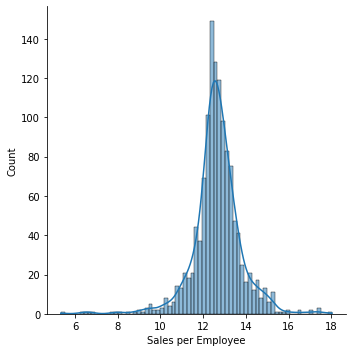

In [ ]:
df_copy["Sales per Employee"] = np.log1p(main_data_set["Sales per Employee"])
sns.displot(df_copy, x="Sales per Employee", kde=True)

## Conclusiones del análisis de distribución

- Podemos ver que el campo *Return on Common Equity* tiene una distribución normal. Por otra parte, las colas de la distribución al presentar valores atípicos, nos llevan a tomar la decisión de llenar los valores N/A con la **mediana**.

- *Accounts Payable Turnover* pese a que no tiene distribución normal, sus valores no son tan dispersos, por lo que los N/A se pueden llenar con la **mediana** también.

- Para los campo *Accounts Receivable Turnover*, *Gross Fixed Asset Turnover* y *Sales per Employee* debemos aplicar la **mediana** sobre los valores condensados usando **logaritmo natural**.

In [ ]:
main_data_set["Return on Common Equity"] = main_data_set["Return on Common Equity"].fillna(main_data_set["Return on Common Equity"].median())
main_data_set["Accounts Payable Turnover"] = main_data_set["Accounts Payable Turnover"].fillna(main_data_set["Accounts Payable Turnover"].median())

#filling N/A values for fields that needed to be transformed by np.log 
main_data_set["Accounts Receivable Turnover"] = df_copy["Accounts Receivable Turnover"].fillna(df_copy["Accounts Receivable Turnover"].median())
main_data_set["Gross Fixed Asset Turnover"] = df_copy["Gross Fixed Asset Turnover"].fillna(df_copy["Gross Fixed Asset Turnover"].median())
main_data_set["Sales per Employee"] = df_copy["Sales per Employee"].fillna(df_copy["Sales per Employee"].median())

#returning transformed fields to its original scale
main_data_set["Accounts Receivable Turnover"] = np.exp(main_data_set["Accounts Receivable Turnover"])
main_data_set["Gross Fixed Asset Turnover"] = np.exp(main_data_set["Gross Fixed Asset Turnover"])
main_data_set["Sales per Employee"] = np.exp(main_data_set["Sales per Employee"])

main_data_set.isna().sum()

Current Ratio                         0
Quick Ratio                           0
Cash Ratio                            0
Free Cash Flow Margin                 0
Revenue Growth Year over Year         0
Common Equity to Tot Assets           0
Long Term Assets as % Total Assets    0
Total Debt to Total Assets            0
Tot Debt to Common Equity             0
Cashflow to Total Liabilities         0
Free Cash Flow to Total Debt          0
Operating Margin                      0
Profit Margin                         0
Net Income Margin Adjusted            0
Return on Assets                      0
Return on Common Equity               0
Accounts Receivable Turnover          0
Accounts Payable Turnover             0
Net Fixed Asset Turnover              0
Gross Fixed Asset Turnover            0
Asset Turnover                        0
Sales per Employee                    0
dtype: int64

#Selección de características
Para la selección de características realizamos un análisis de correlaciones expliyendo aquellas que tuvieran una relación muy elevada fuese directa o inversamente porporcional. 

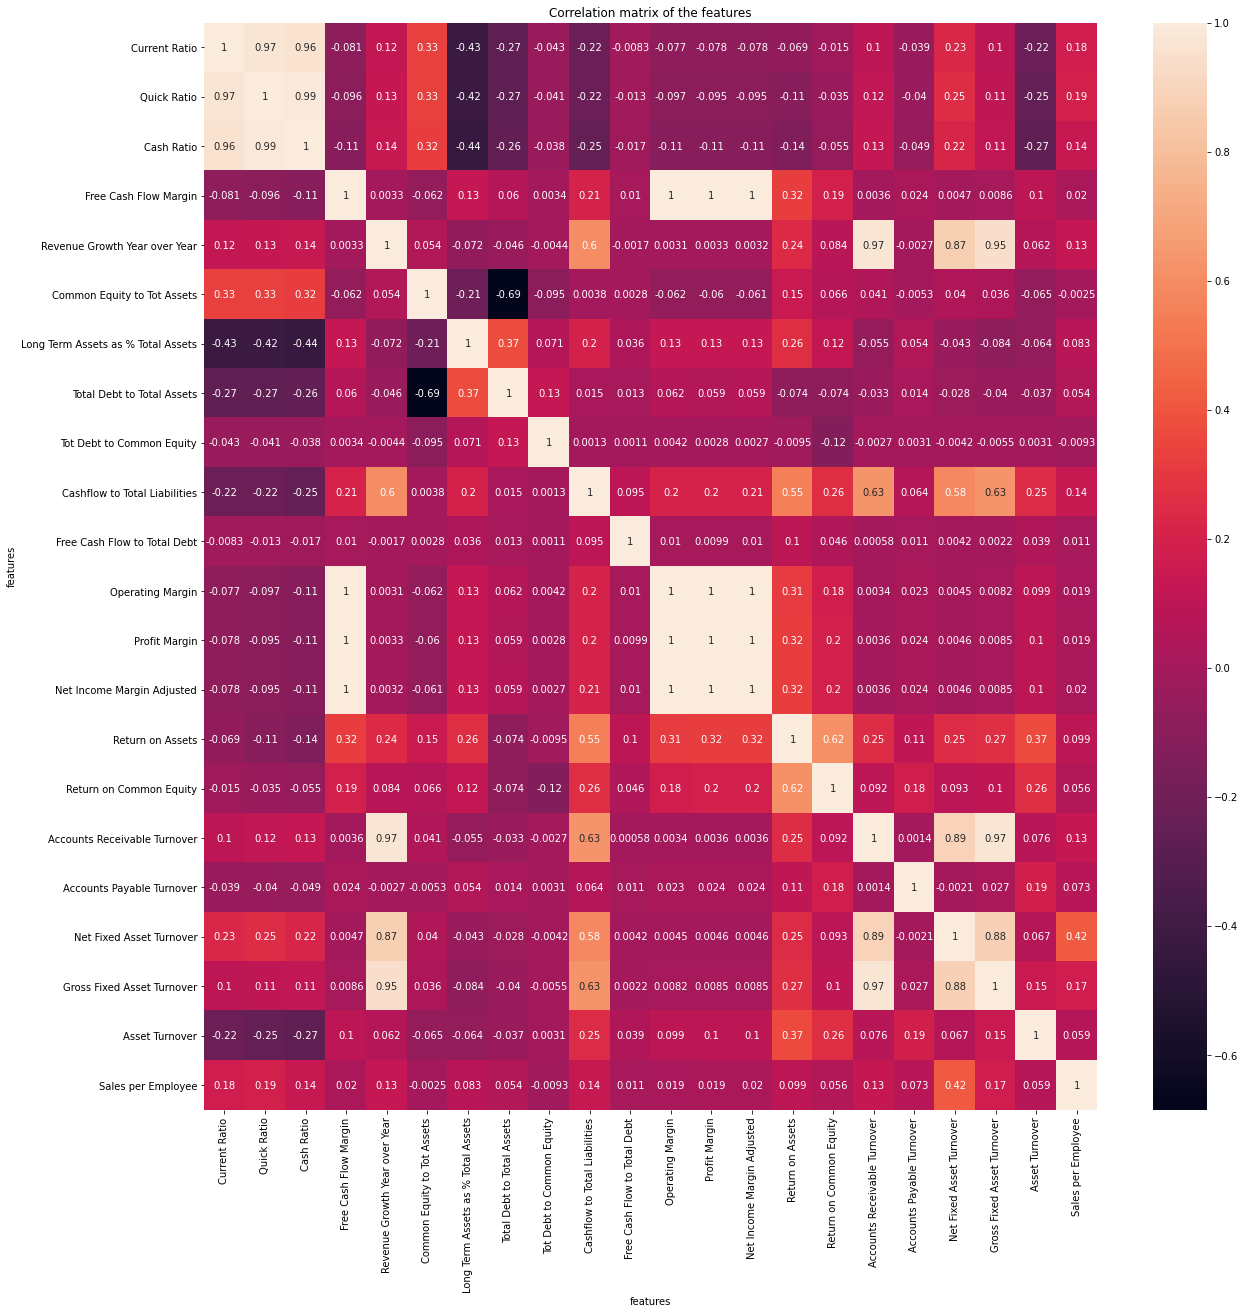

Free Cash Flow to Total Debt          1.445549
Tot Debt to Common Equity             1.595475
Accounts Payable Turnover             1.960681
Sales per Employee                    3.031123
Total Debt to Total Assets            3.649665
Common Equity to Tot Assets           3.673962
Asset Turnover                        3.816123
Return on Common Equity               4.045496
Long Term Assets as % Total Assets    4.521217
Operating Margin                      5.401243
Profit Margin                         5.418924
Free Cash Flow Margin                 5.422222
Net Income Margin Adjusted            5.424650
Revenue Growth Year over Year         5.492880
Accounts Receivable Turnover          5.505850
Current Ratio                         5.607382
Gross Fixed Asset Turnover            5.661067
Quick Ratio                           5.870489
Net Fixed Asset Turnover              5.879785
Return on Assets                      5.922231
Cash Ratio                            5.965213
Cashflow to T

In [ ]:
correlation_mat = main_data_set.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of the features", y=-0.75)
plt.xlabel("features")
plt.ylabel("features")
plt.show()
np.absolute(correlation_mat).sum().sort_values()

Como podemos ver en el mapa, existen algunas variables con alta correlación, por lo cual, basados en una de las fuentes hicimos la eliminación de las variables que tuvieran una correlación muy fuerte con el resto de variables (siendo el valor de la correlación entre 2 variable mayor a 0,9) y basados en criterios financieros eliminamos variables que tuvieran el mismo impacto sobre la muestra.

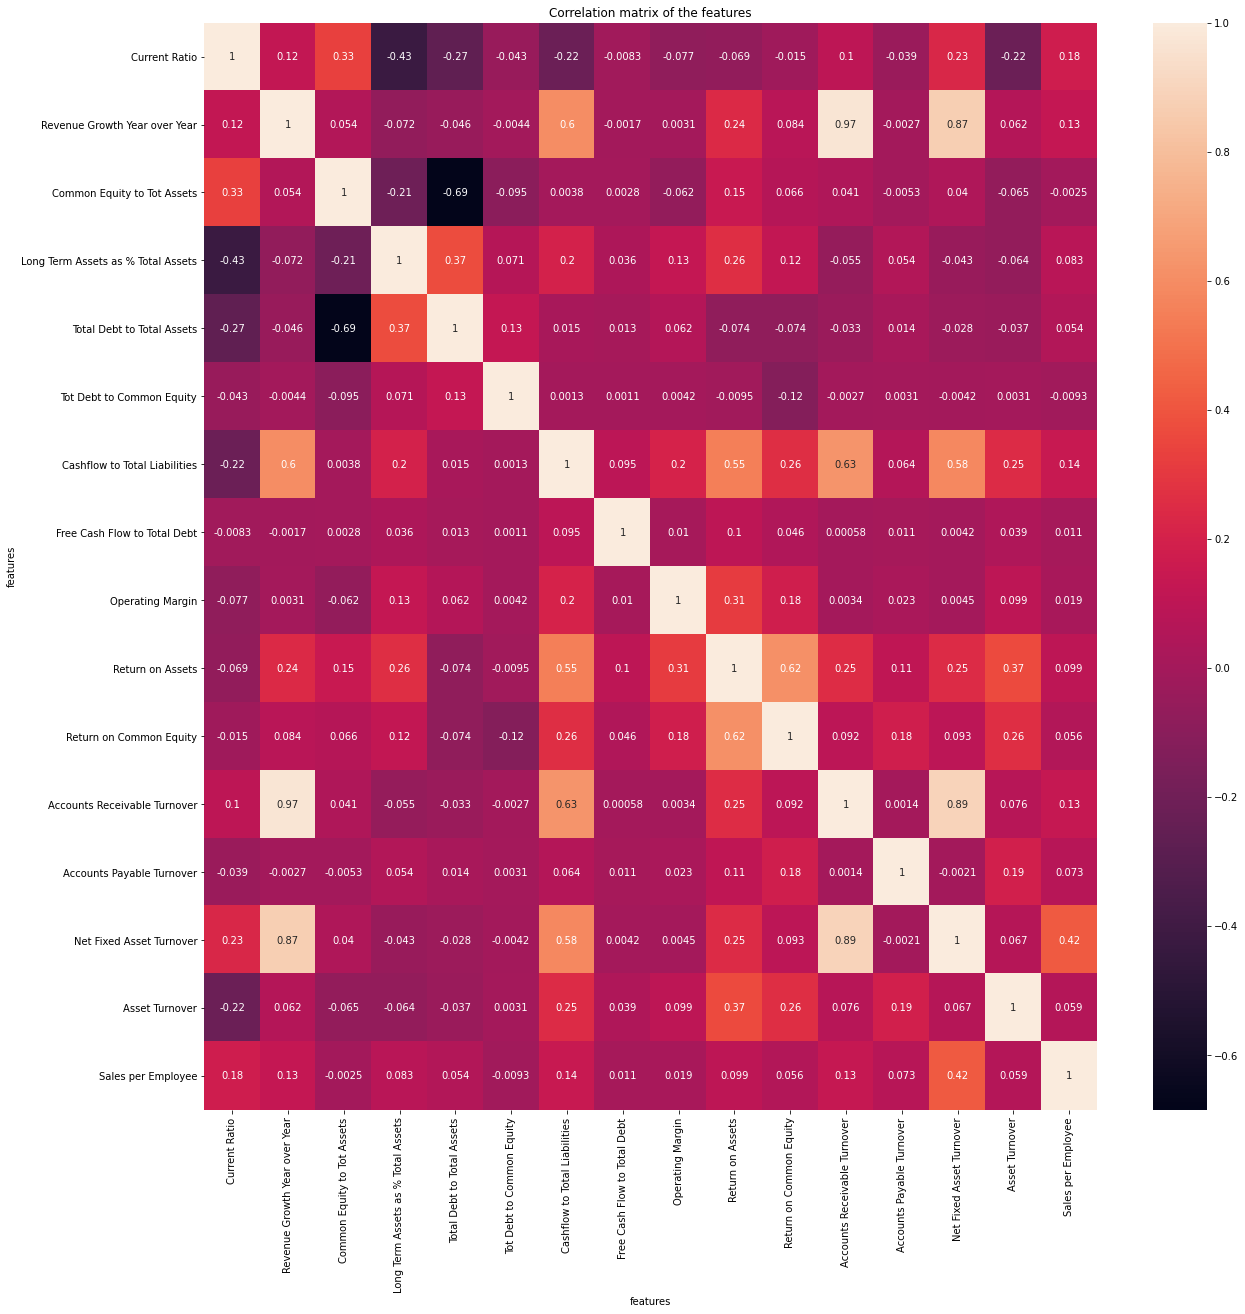

Free Cash Flow to Total Debt          1.383840
Tot Debt to Common Equity             1.502270
Accounts Payable Turnover             1.772424
Operating Margin                      2.192600
Sales per Employee                    2.460193
Common Equity to Tot Assets           2.808279
Asset Turnover                        2.847297
Total Debt to Total Assets            2.901189
Long Term Assets as % Total Assets    3.192474
Return on Common Equity               3.266177
Current Ratio                         3.344588
Revenue Growth Year over Year         4.260564
Accounts Receivable Turnover          4.284778
Return on Assets                      4.454042
Net Fixed Asset Turnover              4.517920
Cashflow to Total Liabilities         4.809474
dtype: float64

In [ ]:
highly_correlated = ['Net Income Margin Adjusted',
                     'Profit Margin',
                     'Free Cash Flow Margin',
                     'Quick Ratio',
                     'Cash Ratio',
                     'Gross Fixed Asset Turnover']

main_data_set = main_data_set.drop(columns=highly_correlated)

correlation_mat = main_data_set.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of the features", y=-0.75)
plt.xlabel("features")
plt.ylabel("features")
plt.show()
np.absolute(correlation_mat).sum().sort_values()

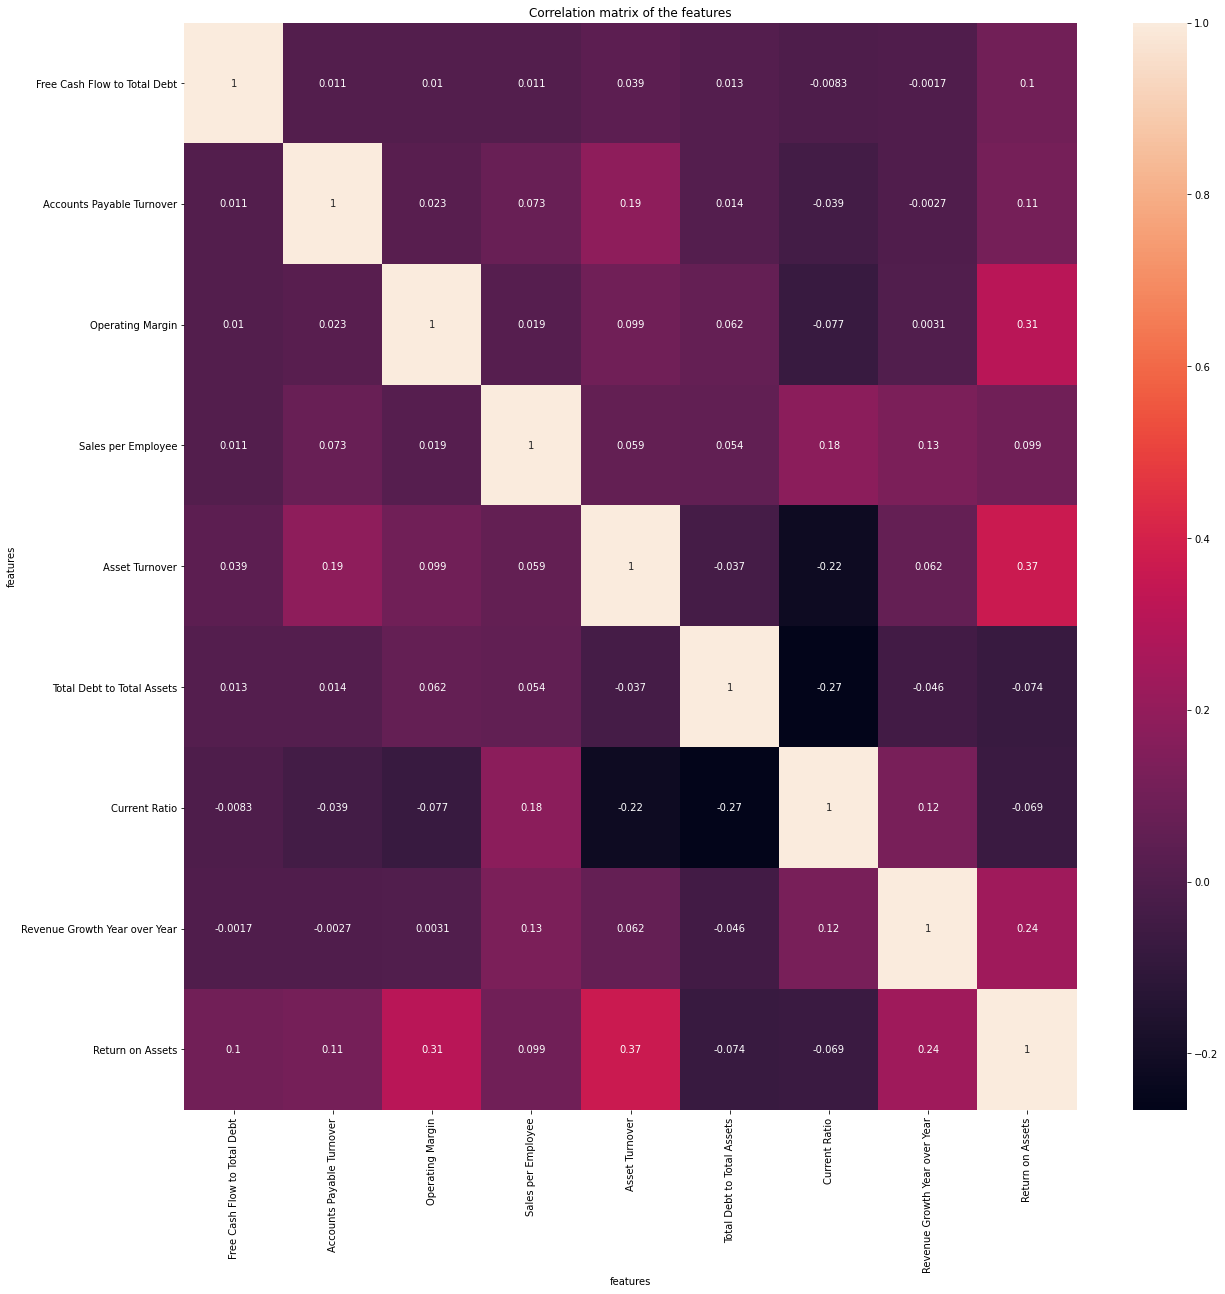

In [ ]:
selected = ["Free Cash Flow to Total Debt",  
            "Accounts Payable Turnover", 
            "Operating Margin", 
            "Sales per Employee", 
            "Asset Turnover", 
            "Total Debt to Total Assets", 
            "Current Ratio", 
            "Revenue Growth Year over Year", 
            "Return on Assets",]

main_data_set = main_data_set[selected]
correlation_mat = main_data_set.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of the features", y=-0.75)
plt.xlabel("features")
plt.ylabel("features")
plt.show()

#Normalización de características

La normalización nos ayuda a cambiar los valores de campos numéricos a una escala común, sin diferencias que distorcionen en el rango de valores. Por otra, con el QuantileTransformer, los valores toman a su vez una distribución normal.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal', random_state=0,copy=False)
print(main_data_set.head()) # printing before scaling
scaler.fit_transform(main_data_set)
main_data_set.head() # printing after scaling

   Free Cash Flow to Total Debt  ...  Return on Assets
0                      0.084588  ...          0.643278
1                      0.015343  ...         -1.152894
2                      2.715859  ...          8.974944
3                     -0.102825  ...        -33.368719
4                      0.248287  ...          5.033207

[5 rows x 9 columns]


,Free Cash Flow to Total Debt,Accounts Payable Turnover,Operating Margin,Sales per Employee,Asset Turnover,Total Debt to Total Assets,Current Ratio,Revenue Growth Year over Year,Return on Assets
0,-0.210881,1.122314,1.481080,0.696103,-0.156567,2.334173,0.899088,0.241628,0.094313
1,-0.437204,-0.862508,0.177793,1.013150,-0.056170,-0.376062,-0.464003,-0.640788,-0.096505
2,1.381600,1.139475,0.044171,1.498065,2.867782,-0.757203,-0.356090,1.555835,1.176934
3,-0.699235,0.000000,-0.986475,0.898314,-0.304193,0.291400,-0.341721,-1.515354,-1.225529
4,0.331458,0.533584,1.282281,-0.965419,-0.452933,0.530849,0.291372,0.527888,0.695112


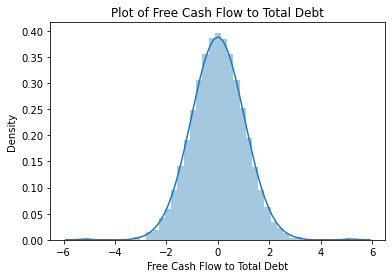

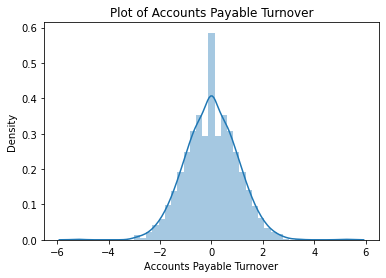

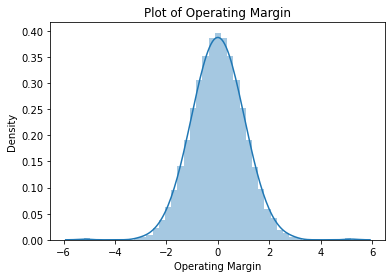

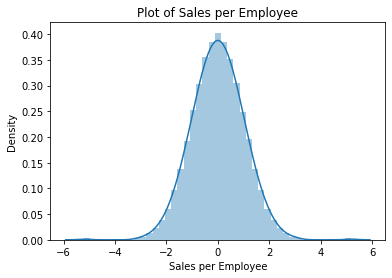

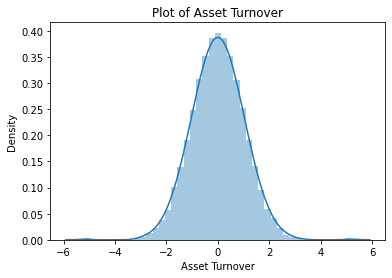

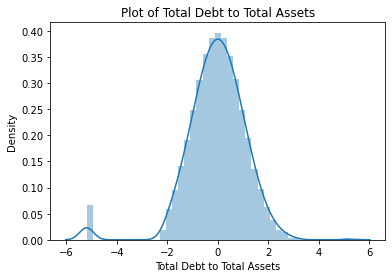

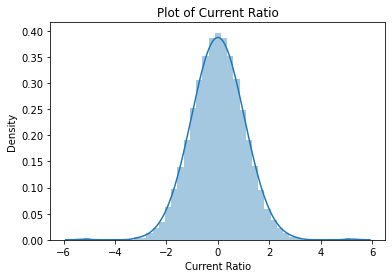

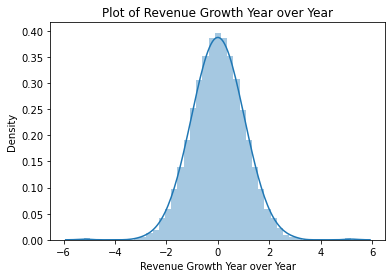

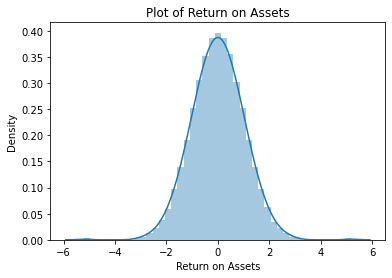

In [ ]:
for field in main_data_set.columns:
    sns.distplot(main_data_set[field], kde=True)
    plt.title(f"Plot of {field}")
    plt.show()

#Modelo

Con el apoyo visual, en esta primera parte se hace un recorrido sobre los posibles random_states para elegir el que mejor resultado nos brinde sobre la muestra.

In [ ]:
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats


def plot_results(inertials, metric:str, xlabel):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(metric)
    plt.show()


ch_random = list()
db_random = list()
#Encontrar la semilla random que se ajuste de mejor manera. 2 diccionarios 
for i in range(10,300,1):
    model= GaussianMixture(n_components=3, random_state= i)
    model.fit(main_data_set)
    cluster_labels = model.predict(main_data_set)

    ch = metrics.calinski_harabasz_score(main_data_set,cluster_labels)
    ch_random.append((i, ch))
    db = metrics.davies_bouldin_score(main_data_set,cluster_labels)
    db_random.append((i, db))

#plot_results(ch_random, "Calinski-Harabasz", "semilla")
#plot_results(db_random, "Daves-Bouldin", "semilla")

max_random = max(ch_random, key= lambda t: t[1])
print(max_random)
min_random = min(db_random, key= lambda t: t[1])
print(min_random)
    

(32, 193.30366135228527)
(256, 1.5448344631787723)


Para aplicar the elbow method hacemos un recorrido sobre los resultados de hasta 12 clusters e identificar en qué número deja de hacer un cambio sustancial en la métrica. Buscando verificar si 3 clusters brindan una buena aproximaxión

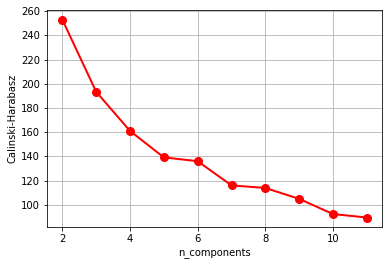

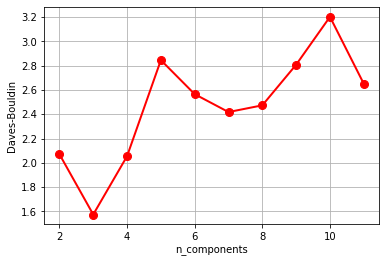

In [ ]:
ch_clusters = list()
db_clusters = list()
#Encontrar el número de clusters con la semilla encontrada anteriormente
for i in range(2,12,1):        
    #train, test = train_test_split(main_data_set, test_size=0.2)
    model = GaussianMixture(n_components=i, random_state=max_random[0])
    #Estimar los parámetros de cada componente con EM
    model.fit(main_data_set)
    cluster_labels = model.predict(main_data_set)
    
    #metrics
    ch = metrics.calinski_harabasz_score(main_data_set,cluster_labels)
    ch_clusters.append((i, ch))
    db = metrics.davies_bouldin_score(main_data_set,cluster_labels)
    db_clusters.append((i, db))

plot_results(ch_clusters, "Calinski-Harabasz", "n_components")
plot_results(db_clusters, "Daves-Bouldin", "n_components")

#Pruebas con DBSCAN

         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
-1                                 98  ...                98
 0                               1216  ...              1216

[2 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
-1                                 30  ...                30
 0                               1284  ...              1284

[2 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
-1                                  5  ...                 5
 0                               1291  ...              1291
 1                                 18  ...                18

[3 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
-1                 

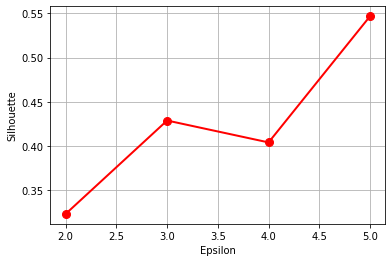

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

sl_random = list()
#Encontrar la semilla random que se ajuste de mejor manera. 2 diccionarios 
for i in np.arange(2, 6, 1):
    model= DBSCAN(eps=i, min_samples=10).fit(main_data_set)
    cluster_labels = model.fit_predict(main_data_set)

    unscaled = scaler.inverse_transform(main_data_set.copy())
    unscaled_df = pd.DataFrame(unscaled, columns=main_data_set.columns)
    unscaled_df.insert(1,'Cluster',cluster_labels)
    print(unscaled_df.groupby('Cluster').count())


    sl = metrics.silhouette_score(main_data_set,cluster_labels)
    sl_random.append((i, sl))


plot_results(sl_random, "Silhouette", "Epsilon")

#Pruebas con Algoritmos basados en distancia

##MeanShift

         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                   3  ...                 3
1                                   2  ...                 2
2                                   2  ...                 2
3                                   2  ...                 2
4                                   2  ...                 2
...                               ...  ...               ...
1297                                1  ...                 1
1298                                1  ...                 1
1299                                1  ...                 1
1300                                1  ...                 1
1301                                1  ...                 1

[1302 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                  14  ...                14

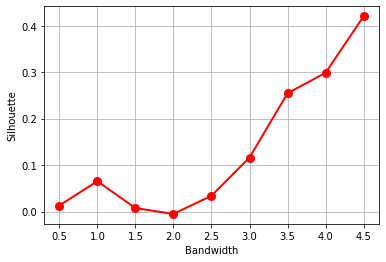

In [ ]:
from sklearn.cluster import MeanShift

sl_random = list()
#Encontrar la semilla random que se ajuste de mejor manera. 2 diccionarios 

for i in np.arange(0.5, 5, 0.5):
    model = MeanShift(bandwidth=i)
    cluster_labels = model.fit_predict(main_data_set)

    unscaled = scaler.inverse_transform(main_data_set.copy())
    unscaled_df = pd.DataFrame(unscaled, columns=main_data_set.columns)
    unscaled_df.insert(1,'Cluster',cluster_labels)
    print(unscaled_df.groupby('Cluster').count())

    sl = metrics.silhouette_score(main_data_set,cluster_labels)
    sl_random.append((i, sl))

plot_results(sl_random, "Silhouette", "Bandwidth")

##Kmeans

         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                 934  ...               934
1                                 380  ...               380

[2 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                 473  ...               473
1                                 260  ...               260
2                                 581  ...               581

[3 rows x 9 columns]
         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                 235  ...               235
1                                 218  ...               218
2                                 354  ...               354
3                                 507  ...               507

[4 rows x 9 columns]
         Free Cash 

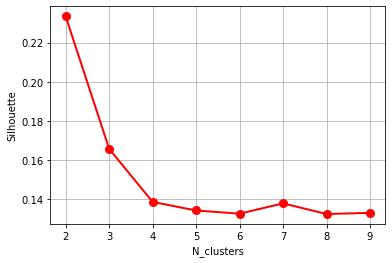

In [ ]:
from sklearn.cluster import KMeans

sl_random = list()
#Encontrar la semilla random que se ajuste de mejor manera. 2 diccionarios 

for i in range(2, 10):
    model = KMeans(n_clusters=i)
    cluster_labels = model.fit_predict(main_data_set)

    unscaled = scaler.inverse_transform(main_data_set.copy())
    unscaled_df = pd.DataFrame(unscaled, columns=main_data_set.columns)
    unscaled_df.insert(1,'Cluster',cluster_labels)
    print(unscaled_df.groupby('Cluster').count())

    sl = metrics.silhouette_score(main_data_set,cluster_labels)
    sl_random.append((i, sl))

plot_results(sl_random, "Silhouette", "N_clusters")

#Modelo Gaussian Mixture

In [ ]:
model = GaussianMixture(n_components=3, random_state=max_random[0])
#Estimar los parámetros de cada componente con EM
model.fit(main_data_set)
cluster_labels = model.predict(main_data_set)

clusters = np.unique(cluster_labels)

In [ ]:
entry = np.array([5.985886, 0.545793, -84.875316, 566922.568600, 0.255633, 0.000000, 8.953141, 488.260427, -23.377976])[np.newaxis, :]
scaler.transform(entry)
print(entry)
print(model.predict(entry)[0])

[[ 1.73814651 -2.08387979 -1.10584861  0.78787648 -0.90105159 -5.19933758
   1.45963346  2.12155772 -1.01044672]]
0


In [ ]:
#scaled_means = scaler.inverse_transform(model.means_)
#df = pd.DataFrame(scaled_means, columns=main_data_set.columns)
unscaled = scaler.inverse_transform(main_data_set.copy())
unscaled_df = pd.DataFrame(unscaled, columns=main_data_set.columns)
unscaled_df.insert(1,'Cluster',cluster_labels)

print(unscaled_df.groupby('Cluster').count())

unscaled_df.groupby('Cluster').agg([lambda v: np.quantile(v, .25), lambda v: np.quantile(v, .75)])

         Free Cash Flow to Total Debt  ...  Return on Assets
Cluster                                ...                  
0                                  21  ...                21
1                                 405  ...               405
2                                 888  ...               888

[3 rows x 9 columns]


Free Cash Flow to Total Debt             ... Return on Assets           
                          <lambda_0> <lambda_1>  ...       <lambda_0> <lambda_1>
Cluster                                          ...                            
0                           0.133754   0.133754  ...       -23.377976   8.225094
1                          -2.686400  -0.054660  ...       -41.800818  -9.533094
2                           0.112760   0.759663  ...        -0.846748   7.052952

[3 rows x 18 columns]

# Extrayendo muestras de cada cluster

In [ ]:
unscaled_df.groupby('Cluster').sample(n=5)

,Free Cash Flow to Total Debt,Cluster,Accounts Payable Turnover,Operating Margin,Sales per Employee,Asset Turnover,Total Debt to Total Assets,Current Ratio,Revenue Growth Year over Year,Return on Assets
20,5.985886,0,0.545793,-84.875316,566922.568600,0.255633,0.000000,8.953141,488.260427,-23.377976
613,0.133754,0,1.028932,-82.610730,187364.636400,0.403299,0.000000,1.774171,16.234289,-33.458662
892,0.133754,0,10.287171,-38.324195,303510.754731,0.501410,0.000000,3.634619,30.686333,-19.868905
1183,0.133754,0,6.912707,-6.773815,724775.468900,2.023403,0.000000,3.091810,40.689386,-13.182891
1034,0.133754,0,14.891379,-41.539196,483484.516500,0.075169,0.000000,81.795934,0.153256,-1.917102
714,-0.091238,1,4.840637,-6.449356,132863.453500,0.411704,14.873266,2.809381,2.465596,-1.566640
1298,-2.272572,1,0.300038,-26.673479,642728.810700,0.842196,17.460001,2.178766,83.209081,-23.062102
967,-3.151877,1,4.117647,-2443.338816,23844.137250,0.025546,15.575886,1.025567,0.153256,-62.830874
174,-0.169393,1,21.906857,-50.901533,303510.754731,0.429144,33.801537,3.746183,21.881878,-26.137257
796,-1.198613,1,8.920656,-704.735165,258393.156900,0.049968,14.302427,13.181031,-11.402447,-30.345165


#Métricas de evaluación del modelo


*   Calinski-Harabasz Index: Indica que tan bien definidos están los clusters. (más alto mejor)
*   Daves-Bouldin Index:  Similaridad promedio entre clusters. Habla de la separación entre clusters. (más bajo mejor)

In [ ]:
metrics.calinski_harabasz_score(main_data_set,cluster_labels)

193.30366135228527

In [ ]:
metrics.davies_bouldin_score(main_data_set,cluster_labels)

1.5746593228454093

In [ ]:
metrics.silhouette_score(main_data_set,cluster_labels, metric='euclidean')

0.20628753956945842

# Exportación del modelo

In [ ]:
from joblib import dump
dump(scaler, '../models/scaler.joblib')
dump(model, '../models/model.joblib')

['model.joblib']